Hub Scores:
A: 0.04642540403219994
D: 0.1336603752611538
B: 0.1576359944296732
C: 0.03738913224642653
E: 0.2588144598468665
F: 0.1576359944296732
H: 0.03738913224642653
G: 0.17104950750758033

Authority Scores:
A: 0.10864044011724346
D: 0.13489685434358004
B: 0.1143797407333645
C: 0.3883728003876181
E: 0.06966521184241474
F: 0.11437974073336452
H: 0.0696652118424148
G: 6.46033414769406e-18


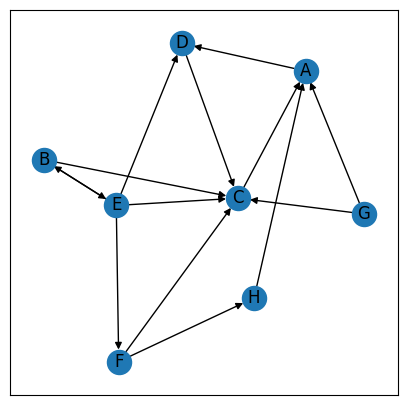

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
graph_matrix = np.array([
[0, 0, 0, 1, 0, 0, 0, 0], # A -> D
[0, 0, 1, 0, 1, 0, 0, 0], # B -> E, C
[1, 0, 0, 0, 0, 0, 0, 0], # C -> A
[0, 0, 1, 0, 0, 0, 0, 0], # D -> C
[0, 1, 1, 1, 0, 1, 0, 0], # E -> B, C, D, F
[0, 0, 1, 0, 0, 0, 0, 1], # F -> C, H
[1, 0, 1, 0, 0, 0, 0, 0], # G -> A, C
[1, 0, 0, 0, 0, 0, 0, 0], # H -> A
])
G = nx.DiGraph()
labels = {}
for i in range(len(graph_matrix)):
  node_label = chr(ord('A') + i)
  labels[i] = node_label
  G.add_node(i, label=node_label)
  for j in range(len(graph_matrix[i])):
    if graph_matrix[i][j] == 1:
        G.add_edge(i, j)
plt.figure(figsize=(5, 5))
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos=pos, with_labels=True, labels=labels)
hubs, authorities = nx.hits(G, max_iter=50, normalized=True)
print("Hub Scores:")
for key, value in hubs.items():
  print(f'{labels[key]}: {value}')
print()
print("Authority Scores:")
for key, value in authorities.items():
  print(f'{labels[key]}: {value}')
plt.show()